# LAB #6 “Braitenberg Vehicles”

## 1.Calibration of sensors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

Firstly, we collected some data from our sensors in order to make them work in the same way.

In [2]:
nxt_values = [0.19, 0.16, 0.22, 0.39, 0.48, 0.54, 0.54, 0.77, 0.88, 0.90,
              0.18, 0.17, 0.20, 0.32, 0.43, 0.45, 0.24, 0.22,
             0.82, 0.88, 0.89, 0.90, 0.90, 0.53, 0.38, 0.40, 0.58, 0.70, 0.31]
ev3_values = [0.01, 0.01, 0.02, 0.1, 0.24, 0.35, 0.38, 0.53, 0.67 , 0.92,
              0.01, 0.009, 0.01, 0.04, 0.14, 0.16, 0.02, 0.019,
             0.54, 0.60, 0.72, 0.78, 0.86, 0.26, 0.11, 0.15, 0.31, 0.45, 0.05]

In [3]:
observed_data = pd.DataFrame(nxt_values, pd.Index(ev3_values,name="ev3"), columns=["nxt"])
observed_data = observed_data.sort_index()

In [4]:
observed_data

,nxt
ev3,
0.009,0.17
0.010,0.19
0.010,0.16
0.010,0.20
0.010,0.18
0.019,0.22
0.020,0.22
0.020,0.24
0.040,0.32


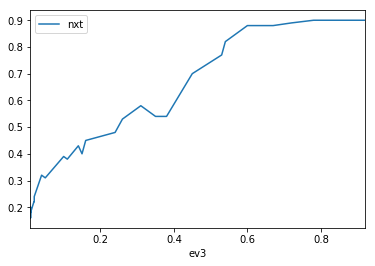

In [5]:
observed_data.plot()

We noticed that we can use linear regression for a part of this data and for the outliners in maximum and minimum area, we just used a constant value.

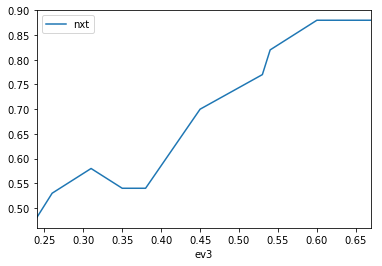

In [6]:
observed_data[0.19:0.7].plot()

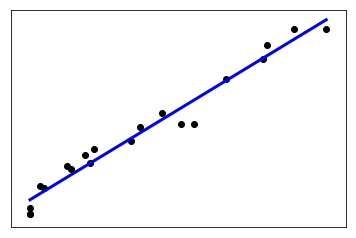

In [7]:
x = observed_data.index.values[5:-4]
y = observed_data.values[5:-4]

x = x.reshape(20, 1)
y = y.reshape(20, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
a = regr.coef_
a

array([[ 0.98633398]])

In [9]:
b = regr.intercept_
b

array([ 0.25056148])

y = ax + b

We used this equation to convert ev3 sensor values to nxt sensor values when they are between 0.19 and 0.7

## 2. Vehicle 1

This vehicle only uses one sensor and speeds up when it senses more light.

[Video for Vehicle 1](https://www.youtube.com/watch?v=gNuXyU8n4sY)

## 3. Vehicle 2
This type of vehicle uses 2 sensors. 
When the sensors are connected to the motors on the same side, the behavior of robot is called "fear". It speeds up when it sees more light and when it encounters a light source it turns away from the source.

[Video for Vehicle 2a](https://www.youtube.com/watch?v=8JgvRFxzGF4)

When the sensors are connected to the motors on the opposite side, the behavior is called "aggression". It also speeds up when it sees more light but this time, when it encounters a light source it goes to this light source.

[Video for Vehicle 2b](https://www.youtube.com/watch?v=4sBrA1ocHMI)

## 4. Vehicle 3
This type of vehicle uses 2 sensors and when they see more light, they slow down the motors unlike Vehicle 2 which speeds up. 
When the sensors are connected to the motors on the same side, it goes fast in the dark and goes towards the light but when it gets too close to the light it stops. This behavior is called "love". <3

[Video for Vehicle 3a](https://www.youtube.com/watch?v=qMyM5R4eL5A)

When the sensors are connected to the motors on the opposite side, it goes fast in the dark and goes towards the light but when it gets too close to the light it goes away from this light source and looks for the others. This behavior is called "exploration".

[Video for Vehicle 3b](https://www.youtube.com/watch?v=HmaNdLNpPS8)

## 5. Vehicle 4
This type of vehicle does not directly give the output from sensors to motors as input. It evaluates them and then gives them to the motors according to the result of the evalution. In this case, when the sensed light is up to one particular point, it speeds up the motors, after that point it slows down the motors. 

[Video for Vehicle 4](https://www.youtube.com/watch?v=eConrNiA67g)

In theory, this design should work as described in the given document. However, we could not manage to find a round light source which distributes light in every way, so  it does not behave exactly as it is wanted from us. But then again, it should work as desired with the correct light source, so we tried to show it in this video.